In [10]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import optimize

In [11]:
eps = 0.0001
np.random.seed(42)

delta = np.random.rand(1001)

def produce_function(x):
    return 1 / (x**2 - 3*x + 2)

x = np.linspace(0, 3, 1001)
y = np.zeros(1001)
for i, xi in enumerate(x):
    f_x = produce_function(xi)
    if f_x < -100:
        y[i] = -100 + delta[i]
    elif -100 <= f_x <= 100:
        y[i] = f_x + delta[i]
    else:
        y[i] = 100 + delta[i]

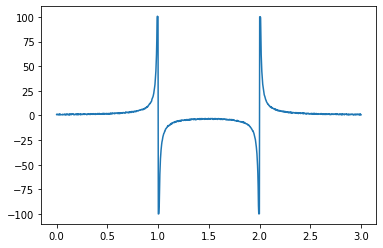

In [12]:
plt.plot(x, y)

In [20]:
def rational_function(x, a, b, c, d):
    return (a*x + b) / (x**2 + c * x + d)

def cost_func_vect(params, gt, x):
    a, b, c, d = params

    value = (gt - rational_function(x, a, b, c, d))
    return value

def cost_func(params, gt, x):
    a, b, c, d = params

    value = sum((gt - rational_function(x, a, b, c, d))**2)
    return value

Levenberg Markquardt: solution [-1.58914884  1.58051806 -1.97337772  0.97480361], # function evaluations 86
Nelder Mead: solution [-0.01639876  0.01404812 -2.01994314  1.02006443], # function evaluations 548, # iters 318
Annealing: solution [-1.00082156  1.0013062  -2.00087906  1.00089518], # function evaluations 8856, # iters 1000
Differential evolution: solution [-1.00255423  1.00302914 -2.00086813  1.00088429], # function evaluations 9535, # iters 156


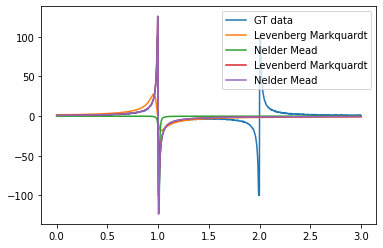

In [44]:
params_lm = optimize.least_squares(cost_func_vect, [1, 0, 1, 1], args=(y, x), method='lm', xtol=eps)
print(f'Levenberg Markquardt: solution {params_lm.x}, # function evaluations {params_lm.nfev}')
params_nm= optimize.minimize(cost_func, [1, 0, 1, 1], args=(y, x), method='Nelder-Mead', tol=eps)
print(f'Nelder Mead: solution {params_nm.x}, # function evaluations {params_nm.nfev}, # iters {params_nm.nit}')
params_anneal = optimize.dual_annealing(cost_func, ((-5, 5), (-5, 5), (-5, 5), (-5, 5)), args=(y, x))
print(f'Annealing: solution {params_anneal.x}, # function evaluations {params_anneal.nfev}, # iters {params_anneal.nit}')

params_evol = optimize.differential_evolution(cost_func, ((-5, 5), (-5, 5), (-5, 5), (-5, 5)), args=(y, x), tol=eps)
print(f'Differential evolution: solution {params_evol.x}, # function evaluations {params_evol.nfev}, # iters {params_evol.nit}')

plt.plot(x, y)
plt.plot(x, rational_function(x, *params_lm.x))
plt.plot(x, rational_function(x, *params_nm.x))
plt.plot(x, rational_function(x, *params_anneal.x))
plt.plot(x, rational_function(x, *params_evol.x))
plt.legend(['GT data', 'Levenberg Markquardt', 'Nelder Mead', 'Levenberd Markquardt', 'Nelder Mead'])
